# Masterpiece

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from fastai import *
from fastai.vision import *

In [2]:
tfms = get_transforms(do_flip=True)
data = ImageDataBunch.from_folder("img_amazonie", valid_pct=0.2, ds_tfms=tfms, size =224) # adding the "size" is necessary
# we're having fastai consider that the images are 224*224 squares : it's necessary for GPU processing
data.normalize(imagenet_stats)

ImageDataBunch;

Train: LabelList (380 items)
x: ImageList
Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224)
y: CategoryList
mygale,mygale,mygale,mygale,mygale
Path: img_amazonie;

Valid: LabelList (94 items)
x: ImageList
Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224)
y: CategoryList
douroucouli,anaconda,mygale,anaconda,mygale
Path: img_amazonie;

Test: None

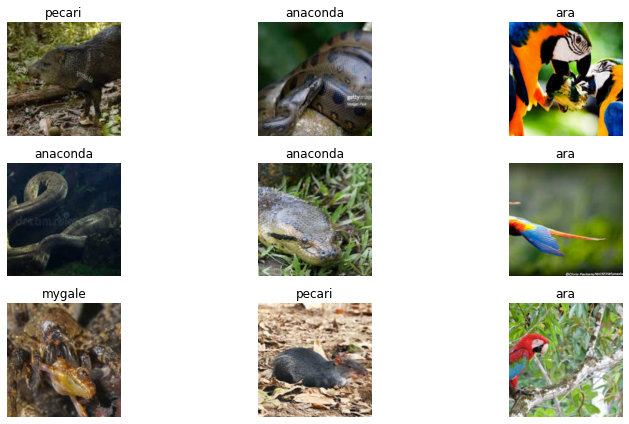

In [3]:
data.show_batch(rows=3, figsize=(12,6))

In [4]:
from ipywidgets import IntProgress

In [5]:
lrnr = cnn_learner(data, models.resnet18, metrics=error_rate)

In [6]:
lrnr.fit_one_cycle(6)

epoch,train_loss,valid_loss,error_rate,time
0,2.582700,0.520888,0.148936,00:02
1,1.485054,0.117093,0.042553,00:01
2,1.018184,0.102451,0.031915,00:02
3,0.760952,0.109920,0.042553,00:02
4,0.604904,0.114135,0.042553,00:02
5,0.488910,0.112888,0.042553,00:02


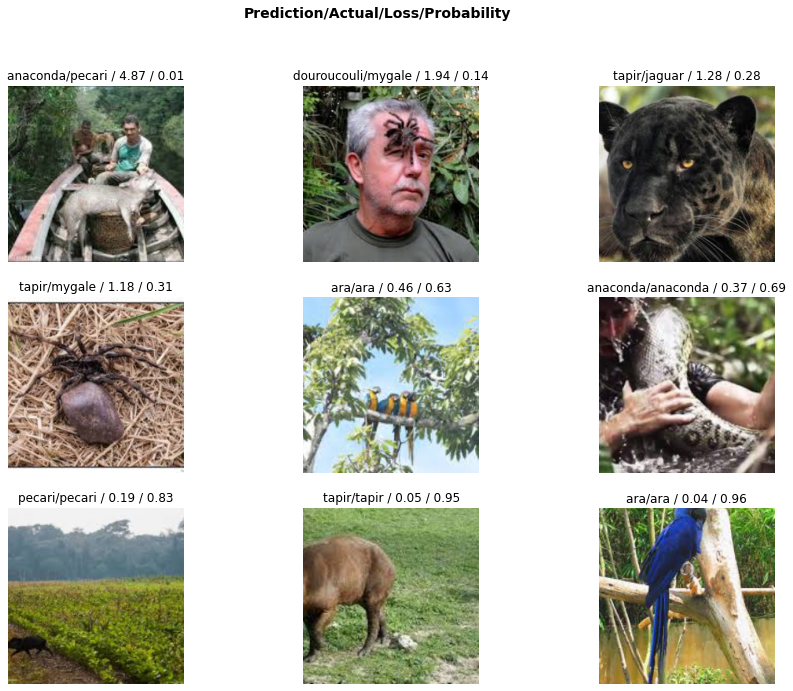

In [7]:
interp = ClassificationInterpretation.from_learner(lrnr)
interp.plot_top_losses(9, figsize=(15, 11))

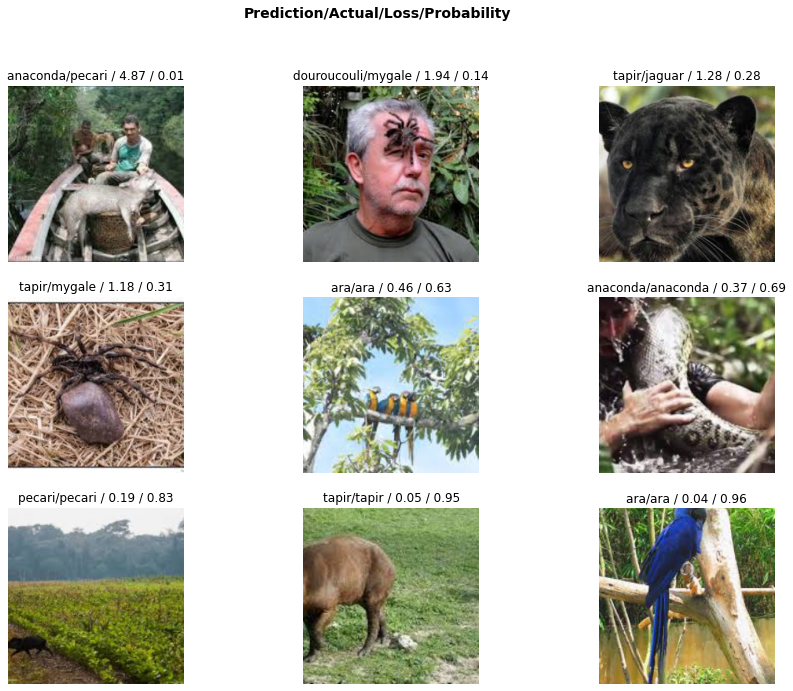

In [8]:
interp = ClassificationInterpretation.from_learner(lrnr)
interp.plot_top_losses(9, figsize=(15, 11))

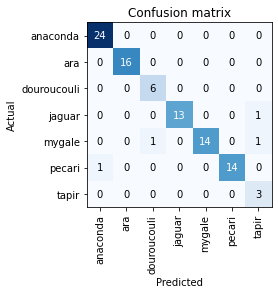

In [9]:
interp.plot_confusion_matrix(figsize=(4,4))

In [15]:
# lrnr.save("weights-masterpiece-v01")
lrnr.export("weights-masterpiece-v02.pkl")

In [13]:
!pwd

/home/gvrx_notifs/masterpiece


In [14]:
!ls -a

 .		     'Loups vs ours.ipynb'   img_amazonie
 ..		      Masterpiece.ipynb     'img_amazonie 2.zip'
 .ipynb_checkpoints   __MACOSX		     img_amazonie.zip
